# **Data Visualization**

# Objectives
Explore and visualize restaurant data across 31 European cities to uncover patterns and insights related to cuisine, ratings, rankings, pricing, and customer engagement. Through interactive visualizations and descriptive analysis, we aim to:

- Understand the distribution and popularity of different cuisine styles across cities.

- Analyze the relationship between restaurant rankings, ratings, and number of reviews.

- Examine how price ranges correlate with ratings and cuisine and city.

These insights can be useful for tourists, restaurant owners, and analysts seeking to better understand the European restaurant landscape.

# Input
* The input can be found [here](../data_set/processed/TA_restaurants_cleaned.csv)
* This is a csv file contained the cleaned data outputted by the ETL process.

# Outputs

- All the visualizations have been saved as PNG files and are stored in a designated folder for easy access and reference, which can be found [here](../Images).

---

# Change working directory
Change the working directory from its current folder to its parent folder as the notebooks will be stored in a subfolder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\euro-dine-insights\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\euro-dine-insights'

Changing path directory to the dataset

In [4]:
#path directory
raw_data_dir = os.path.join(current_dir, 'data_set/raw') 

#path directory
processed_data_dir = os.path.join(current_dir, 'data_set/processed') 


---

# Import packages

In [5]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
sns.set_style('whitegrid') # Set style for visuals
from scipy import stats # Import scipy for statistical tests

---

# Load the cleaned dataset

In [6]:
#load the cleaned dataset
df = pd.read_csv(os.path.join(processed_data_dir, 'TA_restaurants_cleaned.csv'))

#display first 5 rows of data
df.head() 

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136,3,Netherlands
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812,4,Netherlands
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567,6,Netherlands
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564,7,Netherlands
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316,6,Netherlands


---

# Cities and Number of Restaurants

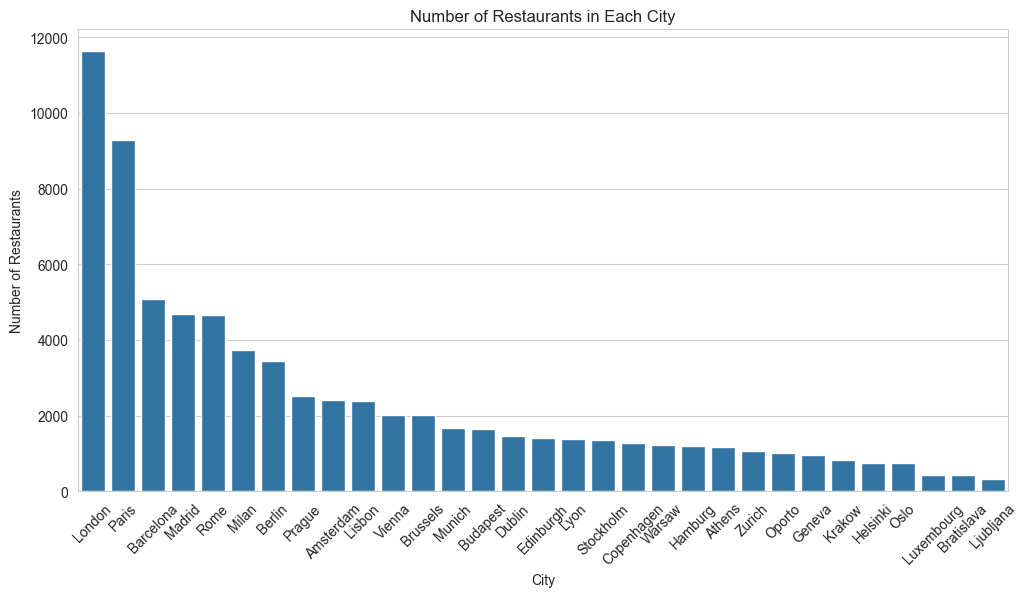

In [7]:
#bar chart showing the number of restaurants in each city
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City', order=df['City'].value_counts().index)
plt.title('Number of Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

### Key Insights:

- London stands out with the highest number of restaurants, exceeding 11,500, making it a major culinary hub in Europe.

- Paris follows with over 9,000 restaurants, reflecting its strong food culture and tourism appeal.

- Cities like Barcelona, Madrid, Rome, and Milan also show high restaurant counts, indicating vibrant dining scenes in Southern Europe.

- A sharp drop occurs after the top few cities  mid-sized cities like Berlin, Prague, Amsterdam, and Lisbon have between 2,000–4,000 restaurants, representing moderate but diverse food offerings.

- Smaller cities such as Ljubljana, Bratislava, Luxembourg, and Oslo have significantly fewer restaurants, reflecting either smaller populations, less tourism, or more concentrated dining markets.

---

# Price Perception
Investigates whether restaurants with higher prices are more likely to achieve better ratings. The analysis will use two key variables: Price Range (grouped into low, medium, and high) and Rating (grouped into Excellent, Average, Poor).

In [8]:
#copy the dataframe to avoid any changes to the original dataframe
df_price = df.copy()

In [9]:
#how many restaurants are in each price range
df_price['Price_Range'].value_counts()

Price_Range
$$ - $$$    52507
$           17639
$$$$         4075
Name: count, dtype: int64

Key Observations:

- The dataset is highly imbalanced across price categories, most restaurants fall into the medium price range around (68%), followed by low priced around (23%), while high priced restaurants are a small minority around (5%).

- Comparing raw counts may bias the results toward medium priced restaurants.

- To gain deeper insights, it will be important to examine the rating distribution within each price range.

In [10]:
#check the categories in the Price_Range column
df_price['Price_Range'].unique()

array(['$$ - $$$', '$$$$', '$'], dtype=object)

In [11]:
#change the Price_Range column into three simplified categories: $$$$ to High, $$ - $$$ to Medium, $ to Low
df_price['Price_Range'] = df_price['Price_Range'].replace({'$$$$': 'High', '$$ - $$$': 'Medium', '$': 'Low'})
#display the first row to confirm changes
df_price.head(1)

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Medium,136,3,Netherlands


In [12]:
#change the Rating column into three simplified categories: Excellent (4-5), Average (3.0–3.9), Poor (1-2.9)
def categorize_rating(rating):
    if rating >= 4.0:
        return 'Excellent'
    elif 3.0 <= rating < 4.0:
        return 'Average'
    else:
        return 'Poor'  
df_price['Rating_Category'] = df_price['Rating'].apply(categorize_rating)
#display the first row to confirm changes
df_price.head(1)

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name,Rating_Category
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Medium,136,3,Netherlands,Excellent


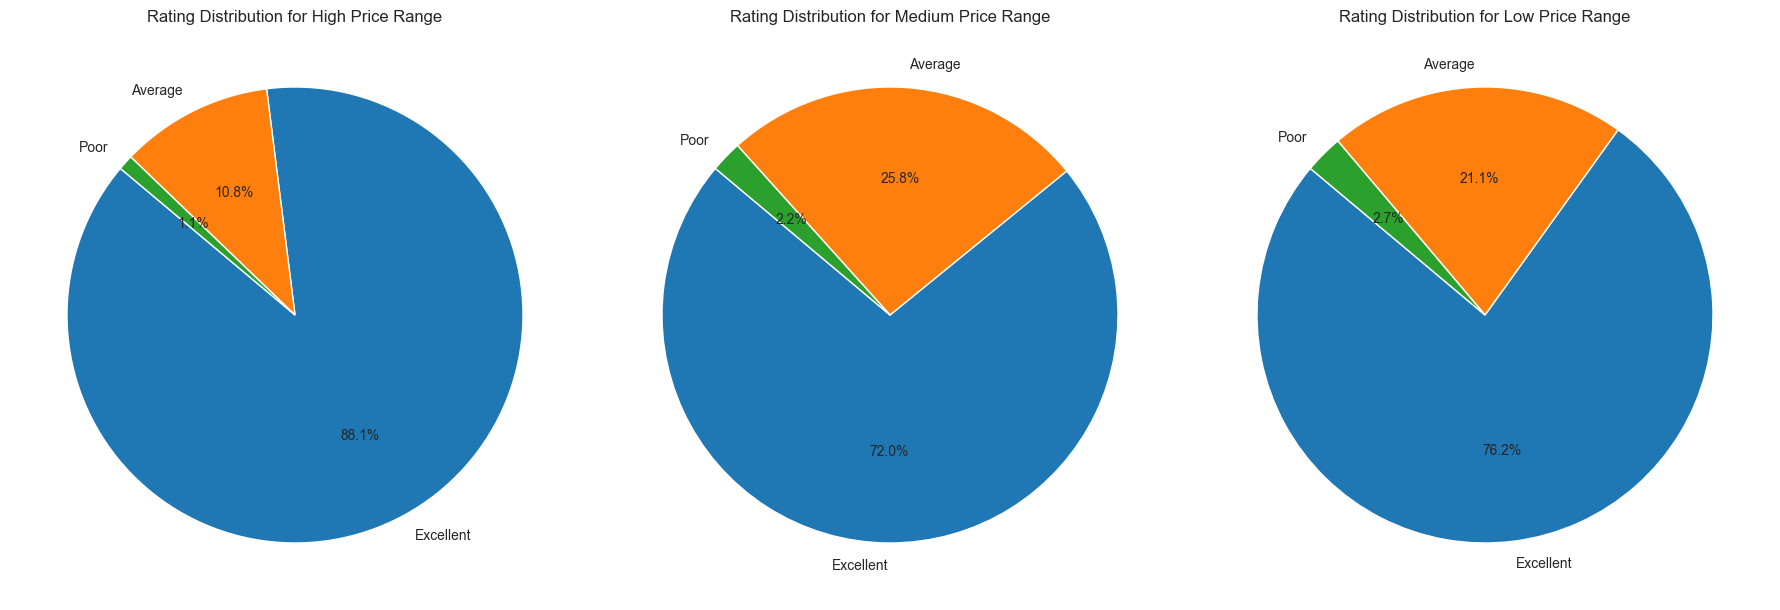

In [13]:
#subplots pie chart showing the proportion of rating categories for each price range
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
price_ranges = ['High', 'Medium', 'Low']
for ax, price in zip(axes, price_ranges):
    data = df_price[df_price['Price_Range'] == price]['Rating_Category'].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Rating Distribution for {price.capitalize()} Price Range')
plt.tight_layout()
plt.show()


### Key Insights:
* High Price Range:

    * 88.1% of high-priced restaurants are rated as Excellent, with only 10.8% rated as Average and a 1.1% rated as Poor.

    * This indicates a strong positive correlation between higher prices and excellent ratings.

* Medium Price Range:

    * The proportion of Excellent ratings drops to 72.0%, while Average ratings increase to 25.8%, and Poor ratings to 2.2%.

    * This shows a more balanced distribution, but still skewed toward excellent ratings.

* Low Price Range:

   * Excellent ratings account for 76.2%, slightly higher than the medium price range but lower than the high range.

### Conclusion:
The data reveals a clear relationship between price range and customer ratings. High priced restaurants receive excellent ratings, supporting the price perception hypothesis. customers may associate higher prices with better quality, services and ambiance.

---

# Price Range Vs City

Analyze how the distribution of restaurant price ranges varies across different European cities. The focus is to test whether cities like Geneva and Zurich have a higher proportion of expensive restaurants compared to cities like Budapest and Krakow. This is expected to reflect differences in economic status, cost of living, and local wealth. This analysis will use two key variables Price Range and City.

<Figure size 1200x800 with 0 Axes>

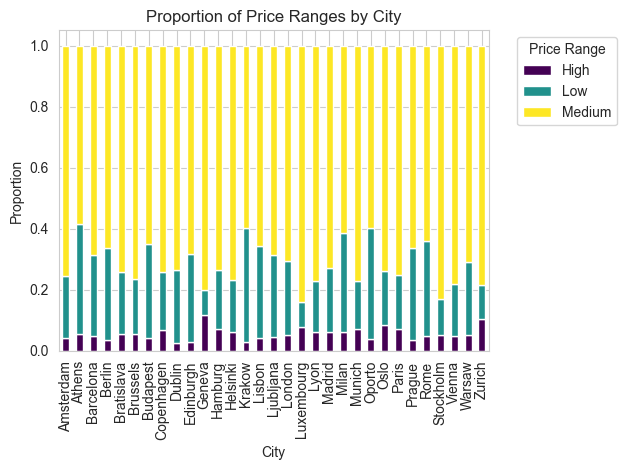

In [14]:
#stacked bar chart Shows the proportion of low, medium, and high-priced restaurants within each city
plt.figure(figsize=(12, 8))
price_city = pd.crosstab(df_price['City'], df_price['Price_Range'], normalize='index')
price_city.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Price Ranges by City')
plt.xlabel('City')
plt.ylabel('Proportion')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Key Observations:

- Across most European cities, medium-priced restaurants dominate, making up the largest proportion in nearly every location.

- Low-priced restaurants represent a significant share in several cities, especially in Krakow and Oporto where their proportions visibly exceed other cities.

- High-priced restaurants consistently make up the smallest proportion across all cities, but their presence is relatively higher in wealthier cities such as Geneva and Zurich, aligning with expectations about local economic status and cost of living.

C:\Users\amron\AppData\Local\Temp\ipykernel_30264\334619498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_price_city.index, y='High_Price_Percentage', data=high_price_city, palette='viridis')


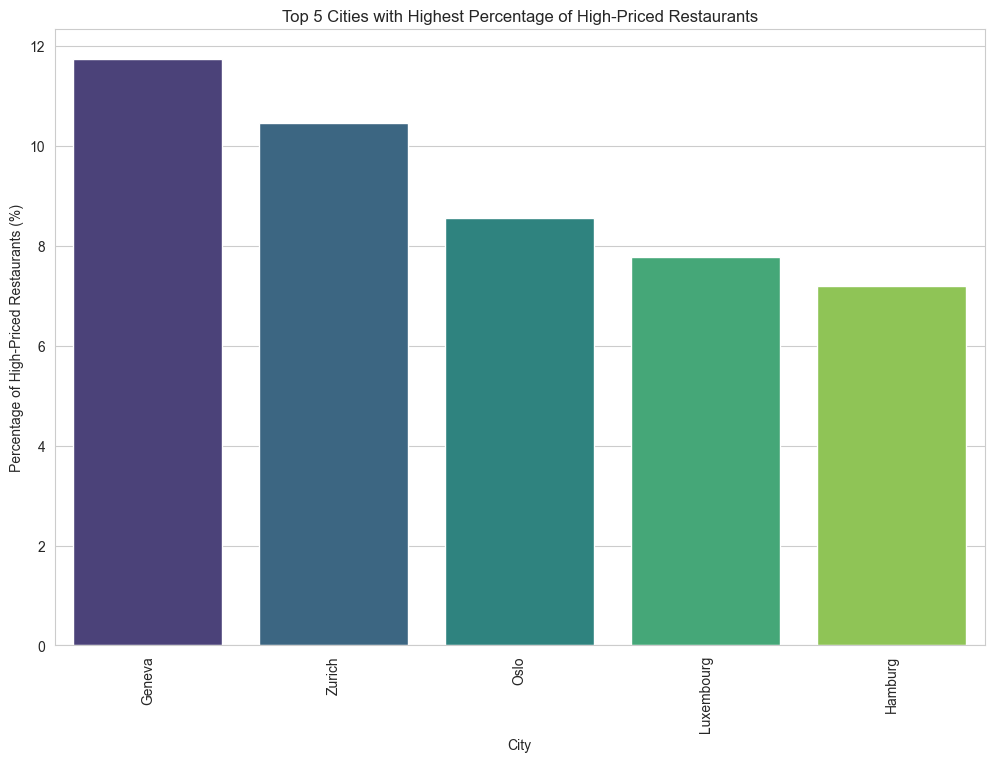

In [15]:
#the top 5 cities have high-priced restaurants 
high_price_city = df_price.groupby(['City', 'Price_Range']).size().unstack(fill_value=0)
high_price_city['Total'] = high_price_city.sum(axis=1)
high_price_city['High_Price_Percentage'] = (high_price_city['High'] / high_price_city['Total']) * 100
high_price_city = high_price_city.sort_values(by='High_Price_Percentage', ascending=False).head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=high_price_city.index, y='High_Price_Percentage', data=high_price_city, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 5 Cities with Highest Percentage of High-Priced Restaurants')
plt.ylabel('Percentage of High-Priced Restaurants (%)')
plt.xlabel('City')
plt.show()

In [16]:
#display the top 5 cities have high-priced restaurants
high_price_city

Price_Range,High,Low,Medium,Total,High_Price_Percentage
City,,,,,
Geneva,112,77,765,954,11.740042
Zurich,113,120,847,1080,10.462963
Oslo,64,132,553,749,8.544726
Luxembourg,34,36,367,437,7.780320
Hamburg,86,232,879,1197,7.184628


Key Observations:

- Geneva has the highest proportion of high-priced restaurants (11.7%), followed closely by Zurich (10.5%). These figures reflect the high cost of living and strong local economies in Switzerland.

- Oslo, Luxembourg, and Hamburg round out the top five, each with high-priced restaurant shares above 7%, indicating affluent local markets.

This distribution highlights cities where expansive dining options are more available.

C:\Users\amron\AppData\Local\Temp\ipykernel_30264\1115624613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_price_city.index, y='Low_Price_Percentage', data=low_price_city, palette='viridis')


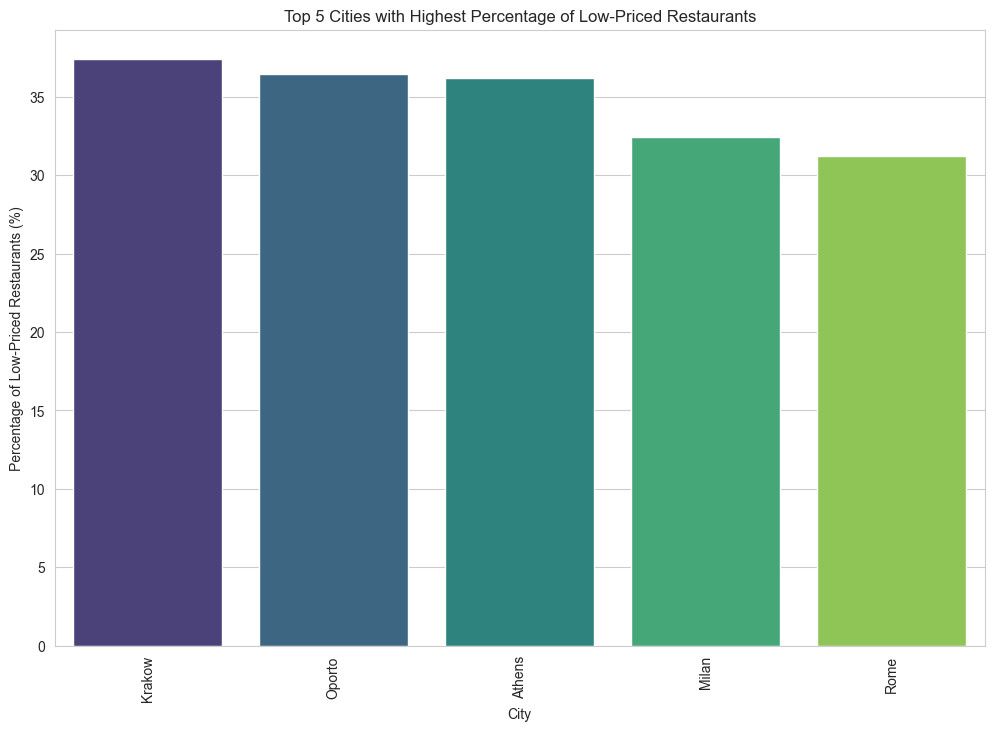

In [17]:
#top 5 cities have low-priced restaurants
low_price_city = df_price.groupby(['City', 'Price_Range']).size().unstack(fill_value=0)
low_price_city['Total'] = low_price_city.sum(axis=1)
low_price_city['Low_Price_Percentage'] = (low_price_city['Low'] / low_price_city['Total']) * 100
low_price_city = low_price_city.sort_values(by='Low_Price_Percentage', ascending=False).head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=low_price_city.index, y='Low_Price_Percentage', data=low_price_city, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 5 Cities with Highest Percentage of Low-Priced Restaurants')
plt.ylabel('Percentage of Low-Priced Restaurants (%)')
plt.xlabel('City')
plt.show()


In [18]:
#display the top 5 cities have low-priced restaurants
low_price_city

Price_Range,High,Low,Medium,Total,Low_Price_Percentage
City,,,,,
Krakow,25,309,492,826,37.409201
Oporto,39,369,605,1013,36.426456
Athens,63,422,681,1166,36.192110
Milan,236,1212,2289,3737,32.432432
Rome,223,1452,2979,4654,31.198969


Key Observations:

- Krakow leads with 37.4% of its restaurants in the low-price category, highlighting a strong emphasis on affordability.

- Oporto (36.4%) and Athens (36.2%) also show a high proportion of low-priced restaurants, reflecting accessible dining scenes for locals and tourists.

- Milan (32.4%) and Rome (31.2%)while generally known for tourism and higher costs, also show a notable share of low-priced restaurants, reflecting a mix of affordability and variety in their dining scenes.

This distribution highlights cities where budget dining options are more available.

### Key Insights:

The analysis clearly shows that price range distribution varies significantly by city, reflecting broader economic and cultural differences:

- Wealthier cities like Zurich and Geneva tend to have a higher proportion of high-priced restaurants, supporting the hypothesis that cost of living and local wealth correlate with restaurant pricing.

- In contrast, cities like Krakow, Oporto, and Athens lean heavily toward low-priced dining options, pointing to more affordable local markets and possibly catering to cost-conscious tourists or residents.

- Medium-priced restaurants dominate across all cities, suggesting they represent the “mainstream” dining segment throughout Europe.

- Milan and Rome, while major cities with diverse markets, show a balance between affordability and upscale options.

### Conclusion:

Overall, these patterns support Price Range vs. City Hypothesis, indicating that economic factors at the city level influence the price range distribution of restaurants. Cities with higher living costs host more expensive restaurants, while more affordable cities offer a larger share of budget-friendly options.  

---

# Cuisine Counts Vs Rating


Analyze whether restaurants offering a greater number of cuisines tend to receive higher customer ratings and possibly more reviews due to more diverse menus. This analysis will use two key variables: Cuisine Counts and Rating.

In [19]:
#copy the dataframe to avoid any changes to the original dataframe
df_cuisine_counts = df.copy()

In [20]:
#check for unique values in Cuisine_Counts column to understand the range of cuisine counts
df_cuisine_counts['Cuisine_Counts'].unique()

array([ 3,  4,  6,  7,  5,  2,  9,  8, 21,  1, 10, 13, 12, 11, 15],
      dtype=int64)

In [21]:
#check for amount values for each unique values in Cuisine_Counts column
df_cuisine_counts['Cuisine_Counts'].value_counts()


Cuisine_Counts
2     14113
3     14006
4     13092
1     12891
5     10195
6      5939
7      2841
8       866
9       207
10       52
11       14
12        2
21        1
13        1
15        1
Name: count, dtype: int64

Grouping the cuisine counts into meaningful categories is necessary for reliable analysis and avoid outlier in a very small group that can affect test results. The categories will be:

- Single Cuisine (1)	
- Small Variety (2–3)	
- Medium Variety (4–6)
- Large Variety	(+7)	


In [22]:
#group the Cuisine_Counts into four categories: Single Cuisine (1), Small Variety (2–3), Medium Variety (4–6), Large Variety (+7)
def categorize_cuisine(count):
    if count == 1:
        return 'Single Cuisine'
    elif 2 <= count <= 3:
        return 'Small Variety'
    elif 4 <= count <= 6:
        return 'Medium Variety'
    else:
        return 'Large Variety'
df_cuisine_counts['Cuisine_Variety'] = df_cuisine_counts['Cuisine_Counts'].apply(categorize_cuisine)
#display the first row to confirm changes
df_cuisine_counts.head(1)

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name,Cuisine_Variety
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136,3,Netherlands,Small Variety


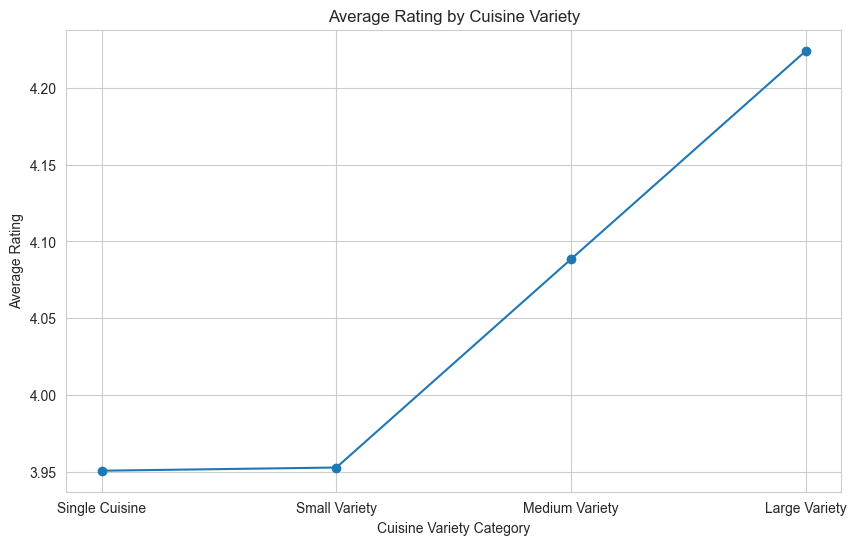

Cuisine_Variety
Single Cuisine    3.950741
Small Variety     3.952825
Medium Variety    4.088603
Large Variety     4.224216
Name: Rating, dtype: float64

In [23]:
#line chart showing the rating average for each cuisine count category
cuisine_rating = df_cuisine_counts.groupby('Cuisine_Variety')['Rating'].mean().reindex(['Single Cuisine', 'Small Variety', 'Medium Variety', 'Large Variety'])
plt.figure(figsize=(10, 6))
plt.plot(cuisine_rating.index, cuisine_rating.values, marker='o')
plt.title('Average Rating by Cuisine Variety')
plt.xlabel('Cuisine Variety Category')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()
#printing  average rating per cuisine variety category
cuisine_rating

In [24]:
#perform ANOVA Test to see if there are significant differences in ratings among the different cuisine variety categories
single_cuisine = df_cuisine_counts[df_cuisine_counts['Cuisine_Variety'] == 'Single Cuisine']['Rating']
small_variety = df_cuisine_counts[df_cuisine_counts['Cuisine_Variety'] == 'Small Variety']['Rating']
medium_variety = df_cuisine_counts[df_cuisine_counts['Cuisine_Variety'] == 'Medium Variety']['Rating']
large_variety = df_cuisine_counts[df_cuisine_counts['Cuisine_Variety'] == 'Large Variety']['Rating']
anova_result = stats.f_oneway(single_cuisine, small_variety, medium_variety, large_variety)
#print the ANOVA test result
print(f'ANOVA F-statistic: {anova_result.statistic}')
print(f'ANOVA p-value: {anova_result.pvalue}')


ANOVA F-statistic: 556.5407899631506
ANOVA p-value: 0.0


Key Observations:

- The ANOVA F-statistic is 556.54 with a p-value of 0.000 (essentially 0).

- This means there are statistically significant differences in mean ratings between at least two of the cuisine variety groups.

- Single Cuisine restaurants (1 cuisine) have the lowest average rating, around 3.95

- Small Variety (2–3 cuisines) shows almost no increase compared to single cuisine, suggesting that offering just a few more options doesn't significantly impact ratings.

- A notable jump in ratings occurs with Medium Variety (4–6 cuisines), where the average rating reaches approximately 4.09.

- Large Variety (7+ cuisines) records the highest average rating nearly (4.23), showing a clear positive relationship between menu diversity and customer ratings.

C:\Users\amron\AppData\Local\Temp\ipykernel_30264\1171753122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine_Variety', y='Rating', data=df_cuisine_counts, order=['Single Cuisine', 'Small Variety', 'Medium Variety', 'Large Variety'], palette='viridis')


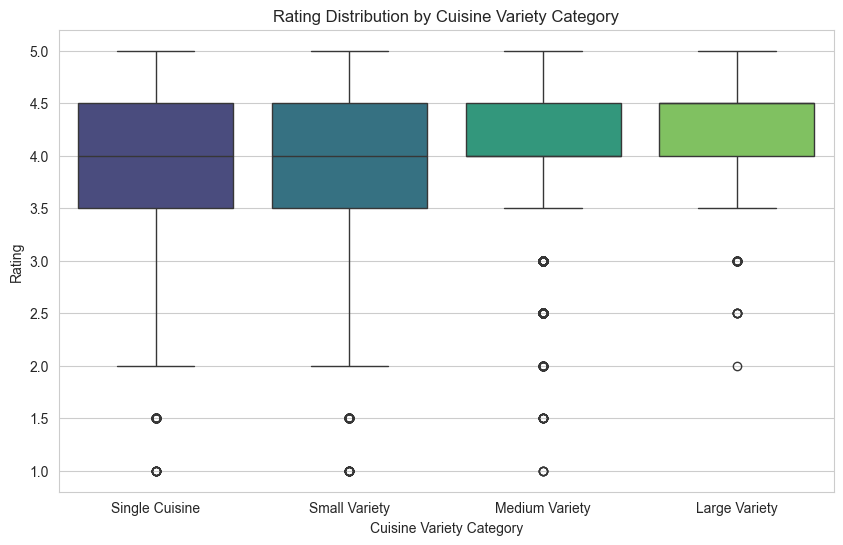

In [25]:
#boxplot of Ratings by Cuisine Variety Category shows distribution, median, and outliers for each category.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cuisine_Variety', y='Rating', data=df_cuisine_counts, order=['Single Cuisine', 'Small Variety', 'Medium Variety', 'Large Variety'], palette='viridis')
plt.title('Rating Distribution by Cuisine Variety Category')
plt.xlabel('Cuisine Variety Category')
plt.ylabel('Rating')
plt.show()

Key Observations:

- Single Cuisine

  - Median rating is around (3.95) and the range is quite wide, showing a larger variability in customer ratings compared to other categories.

- Small Variety (2–3 cuisines)

  - Median is very similar to single cuisine.

- Medium Variety (4–6 cuisines)

  - Median rating is noticeably higher (4.23).

  - The box is more compact compared to small variety and showing fewer extreme low outliers.

- Large Variety (7+ cuisines)

  - Highest median rating, with slightly tighter distribution at the top end, suggesting that many of these restaurants are consistently rated well.

  - Still some low outliers, but fewer relative to total count.

In [26]:
#check the value counts in Cuisine_Variety column to check how many restaurants in each category
df_cuisine_counts['Cuisine_Variety'].value_counts()


Cuisine_Variety
Medium Variety    29226
Small Variety     28119
Single Cuisine    12891
Large Variety      3985
Name: count, dtype: int64

C:\Users\amron\AppData\Local\Temp\ipykernel_30264\645996582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')


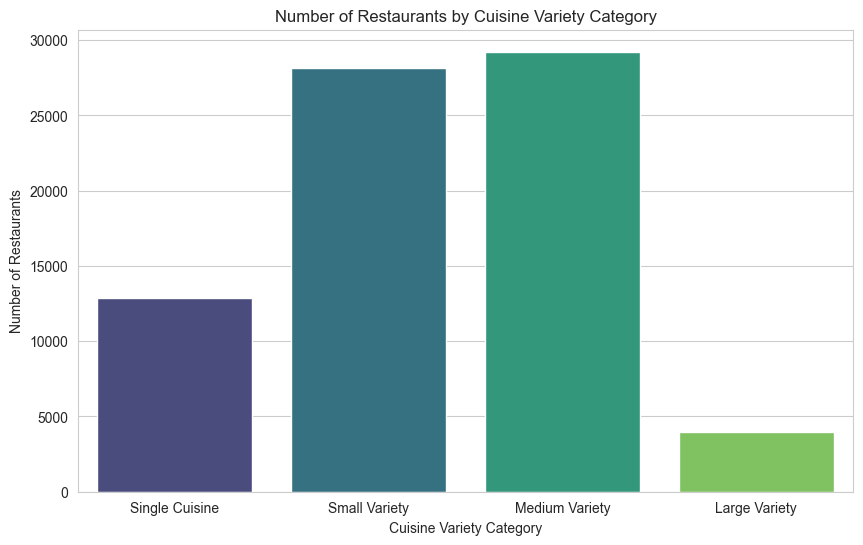

In [27]:
#bar chart of number of restaurants per category
cuisine_counts = df_cuisine_counts['Cuisine_Variety'].value_counts().reindex(['Single Cuisine', 'Small Variety', 'Medium Variety', 'Large Variety'])
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')
plt.title('Number of Restaurants by Cuisine Variety Category')
plt.xlabel('Cuisine Variety Category')
plt.ylabel('Number of Restaurants')
plt.show()

Key Observations:

- Medium Variety Dominates the Dataset

  - The largest share of restaurants falls into the Medium Variety (4–6 cuisines) category, with 29,226 restaurants.

- Small Variety is a Close Second

  - Small Variety (2–3 cuisines) represents 28,119 restaurants, only slightly fewer than medium variety.

- Single Cuisine Restaurants Are Still Substantial

  - With 12,891 restaurants, single cuisine establishments form a considerable segment.

- Large Variety Restaurants Are the Minority

  - Only 3,985 restaurants offer 7 or more cuisines, making this category the smallest group.

  - These are likely buffets, food courts, or multi-cuisine restaurants, which tend to be larger in scale and target broad customer bases like families or tourists.

The distribution suggests that most restaurants prefer offering a focused but moderately diverse menu rather than covering a very wide range of cuisines.


### Key Insights:

- A high F-statistic indicates that the variation between the group means (Single, Small, Medium, Large) is much larger than the variation within the groups.

- Since the p-value < 0.05, we reject the null hypothesis, which stated that all cuisine variety groups have equal mean ratings.

- This strongly suggests that the number of cuisines offered by a restaurant has a significant effect on its average rating.

- Clear Positive Relationship Between Cuisine Variety and Ratings

- The analysis reveals a notable upward trend in average ratings as the number of cuisines offered increases.

- Restaurants with a single cuisine have the lowest average rating (3.95), while those in the large variety category (7+ cuisines) achieve the highest average rating, exceeding 4.2.

- Small Variety (2–3 cuisines) and Medium Variety (4–6 cuisines) categories dominate the dataset, with 28,119 and 29,226 restaurants, respectively.

- Single cuisine restaurants are also common, with 12,891 entries.

- Large Variety restaurants are relatively rare (3,985), but despite their smaller representation, they consistently receive the highest ratings.


- Large variety can be perceived as flexibility and ability to cater to different tastes, increasing perceived value.

- Large variety establishments might include buffet or multi-cuisine venues, which often attract diverse groups and achieve stable, favorable reviews.

  ### Conclusion:

  The findings strongly support the Cuisine Counts Vs Rating hypothesis, restaurants offering a greater number of cuisines tend to receive higher and more consistent customer ratings. This suggests that diversification in cuisine offerings may be a strategic factor for improving customer satisfaction and ratings.
 

---

# Cuisine Based Preferences
Examine whether certain cuisines consistently receive higher customer ratings than others. Customer preferences are often shaped by cultural tastes, dining experiences, and the inherent qualities of the cuisines themselves which may contribute to higher ratings.

In [28]:
#check the cuisine column values
df_price['Cuisine'].unique()

array(["['French', 'Dutch', 'European']",
       "['Dutch', 'European', 'Vegetarian Friendly', 'Gluten Free Options']",
       "['Mediterranean', 'French', 'International', 'European', 'Vegetarian Friendly', 'Vegan Options']",
       ..., "['Bar', 'Sushi', 'Delicatessen', 'Pub', 'Wine Bar']",
       "['Mediterranean', 'European', 'Central European', 'Bar', 'Vegetarian Friendly']",
       "['Chinese', 'Swiss', 'Mediterranean', 'European']"], dtype=object)

Since restaurants often serve multiple cuisines, the dataset contains a list of cuisines per restaurant. To enable accurate analysis, we will split these lists and create a new column where each cuisine is represented as a separate row. This transformation allows us to calculate and compare average ratings across individual cuisines, revealing which types are most favored by customers.

In [29]:
#copy the dataframe to avoid any changes to the original dataframe
df_exploded = df_price.copy()

#split the cuisines into lists
df_exploded['Cuisine_List'] = df_exploded['Cuisine'].str.split(', ')

#explode the list so each cuisine gets its own row
df_exploded = df_exploded.explode('Cuisine_List')

#clean the cuisine strings: remove brackets, quotes, and extra spaces
df_exploded['Cuisine_List'] = (
    df_exploded['Cuisine_List']
    .astype(str)  # ensure it's string type
    .str.replace(r"[\[\]']", '', regex=True)  # remove [ ] and quotes
    .str.strip()  # remove leading/trailing spaces
)
#display the first 5 rows to confirm changes
df_exploded.head()


,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name,Rating_Category,Cuisine_List
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Medium,136,3,Netherlands,Excellent,French
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Medium,136,3,Netherlands,Excellent,Dutch
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Medium,136,3,Netherlands,Excellent,European
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,High,812,4,Netherlands,Excellent,Dutch
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,High,812,4,Netherlands,Excellent,European


In [30]:
#check the info of the new dataframe to confirm the changes
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251537 entries, 0 to 74220
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               251537 non-null  object 
 1   City               251537 non-null  object 
 2   Cuisine            251537 non-null  object 
 3   Ranking            251537 non-null  float64
 4   Rating             251537 non-null  float64
 5   Price_Range        251537 non-null  object 
 6   Number_of_Reviews  251537 non-null  int64  
 7   Cuisine_Counts     251537 non-null  int64  
 8   Country_Name       251537 non-null  object 
 9   Rating_Category    251537 non-null  object 
 10  Cuisine_List       251537 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 23.0+ MB


In [31]:
#how many unique cuisines are in the dataset
df_exploded['Cuisine_List'].nunique()

125

We have 125 unique cuisines in the data set

In [32]:
#the top 20 most common cuisines across European cities
top_cuisines = df_exploded['Cuisine_List'].value_counts().head(20)
top_cuisines

Cuisine_List
Vegetarian Friendly    31939
European               26804
Mediterranean          16912
Italian                14930
Vegan Options          12840
Gluten Free Options    12076
Bar                     8921
Asian                   8001
French                  7880
Pizza                   6922
Spanish                 6574
Pub                     6260
Cafe                    5716
British                 4390
Fast Food               4093
Central European        4049
Seafood                 3996
International           3996
Japanese                3685
American                3313
Name: count, dtype: int64

Key Observations:

- Vegetarian Friendly, Vegan Options, Gluten Free Options  is the most common dietaries preferences in the dataset, reflecting growing demand for dietary preferences.

- Bar and Pub establishments together represent a significant segment, indicating that social and casual dining plays a big role in European food culture.

- Rows containing 'Vegetarian Friendly', 'Vegan Options', and 'Gluten Free Options' reflect dietary preferences rather than actual cuisines. Similarly, rows with 'Bar', 'Pub', 'Cafe' and 'Wine Bar' indicate types of venues rather than culinary styles. Their presence in the Cuisine_List inflates counts for non-cuisine categories, which can effects the true distribution of food types. Removing these rows allows a clearer focus on actual cuisines

In [33]:
#drop rows with non-cuisine items from Cuisine_List column which are: 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options', 'Bar', 'Pub', 'Cafe'
non_cuisines = ['Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options', 'Bar', 'Pub', 'Cafe', 'Wine Bar']
df_exploded = df_exploded[~df_exploded['Cuisine_List'].isin(non_cuisines)]



In [34]:
#print the top 20 most common cuisines across European cities to confirm changes
top_cuisines = df_exploded['Cuisine_List'].value_counts().head(20)
top_cuisines

Cuisine_List
European            26804
Mediterranean       16912
Italian             14930
Asian                8001
French               7880
Pizza                6922
Spanish              6574
British              4390
Fast Food            4093
Central European     4049
International        3996
Seafood              3996
Japanese             3685
American             3313
Sushi                2880
Portuguese           2761
Chinese              2681
Indian               2432
Middle Eastern       1975
Thai                 1849
Name: count, dtype: int64

C:\Users\amron\AppData\Local\Temp\ipykernel_30264\3362660157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


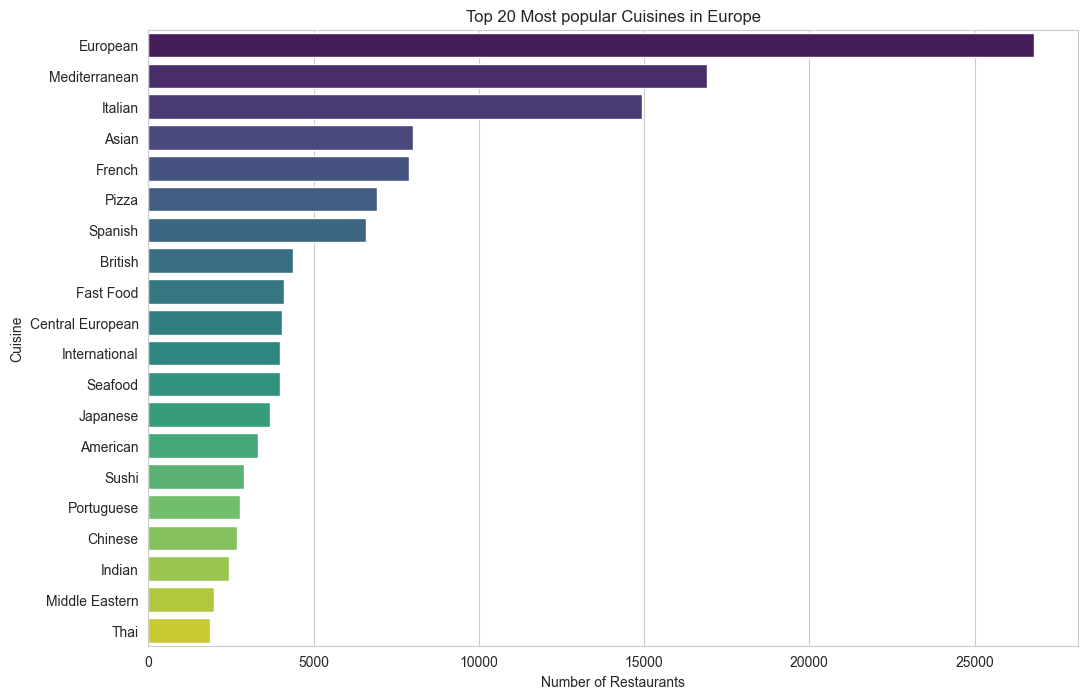

In [35]:
#bar chart showing the top 20 most popular cuisines across European cities
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 20 Most popular Cuisines in Europe')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

Key Observations:
- European cuisines dominates with (26,804), reflecting the prevalence of traditional European-style restaurants across the European cities.

- Mediterranean (16,912) and Italian (14,930) rank high, showing widespread appeal of Mediterranean diets and Italian cuisine.

- Diverse Asian cuisine presence with (8,001), Japanese (3,685), Chinese (2,681), Indian (2,432), Thai (1,849), and Sushi (2,880).


- French (7,880), Spanish (6,574), British (4,390), Central European (4,049), and Portuguese (2,761) suggest regional culinary diversity within Europe itself.

- General and fast dining options exist alongside traditional cuisines with Fast Food (4,093) and International (3,996) show that many cities also cater to quick meals and globally-inspired menus.


- Seafood (3,996) indicates a notable presence, likely reflecting local or coastal preferences in some cities.

- Middle Eastern cuisine (1,975), contributes to the long-tail of the top 20 cuisines, representing diversity rather than volume.

In [36]:
#most popular cuisine in each city
most_popular_cuisine = df_exploded.groupby(['City', 'Cuisine_List']).size().reset_index(name='Count')
most_popular_cuisine = most_popular_cuisine.loc[most_popular_cuisine.groupby('City')['Count'].idxmax()]
most_popular_cuisine = most_popular_cuisine.sort_values(by='Count', ascending=False)
most_popular_cuisine.head(31)   


,City,Cuisine_List,Count
1843,Paris,French,4787
2041,Rome,Italian,3648
1206,London,British,3523
211,Barcelona,Mediterranean,2858
1513,Madrid,Spanish,2653
1572,Milan,Italian,2535
1085,Lisbon,European,1691
1936,Prague,European,1612
31,Amsterdam,European,1358
280,Berlin,European,1238


C:\Users\amron\AppData\Local\Temp\ipykernel_30264\1622419766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='City', data=most_popular_cuisine.head(31), palette='viridis')


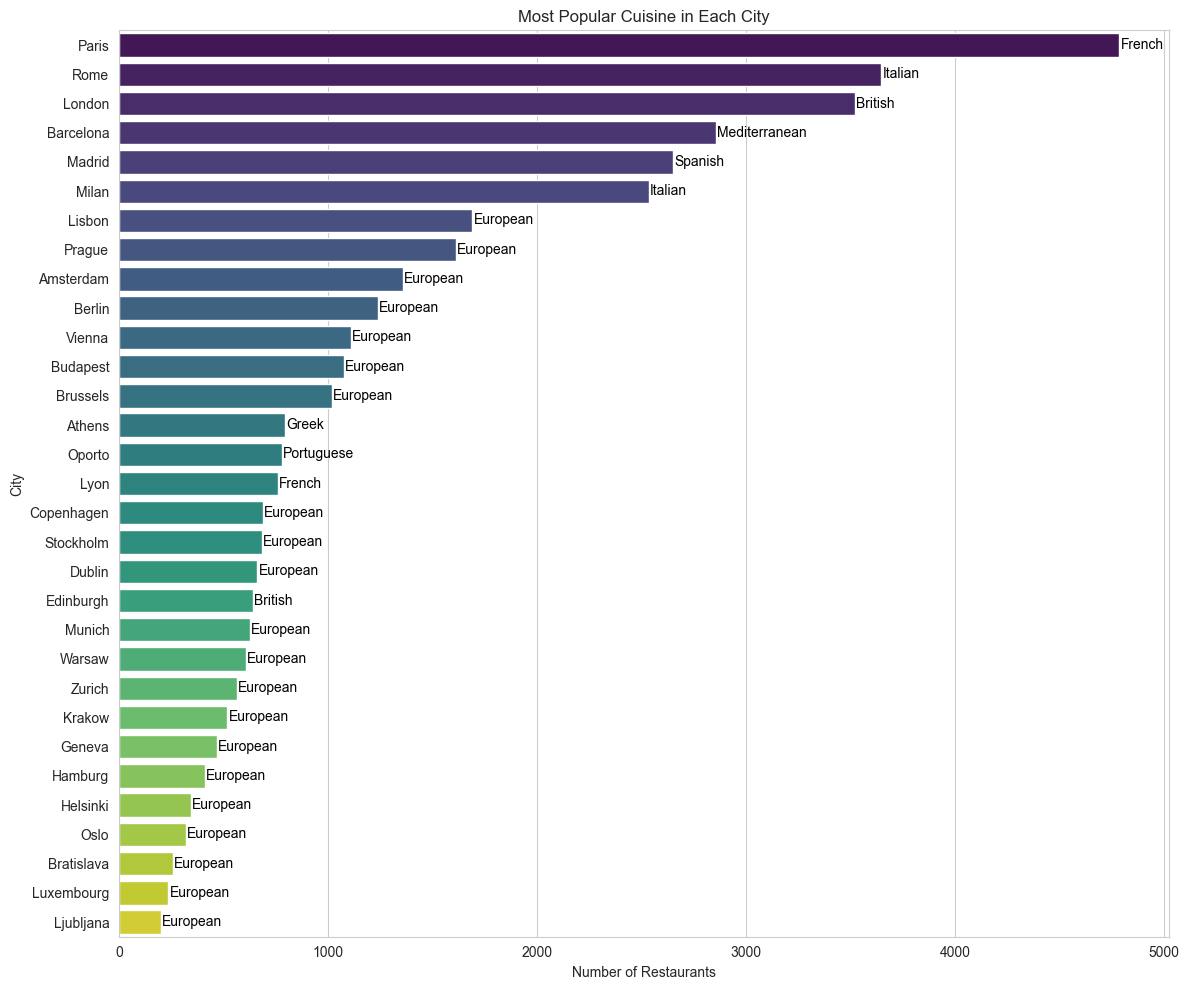

In [37]:
#bar chart for the most popular cuisine in each city
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Count', y='City', data=most_popular_cuisine.head(31), palette='viridis')
plt.title('Most Popular Cuisine in Each City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')

#add cuisine name labels on the bars
for i, (count, cuisine) in enumerate(zip(most_popular_cuisine.head(31)['Count'], most_popular_cuisine.head(31)['Cuisine_List'])):
    ax.text(count + 5, i, cuisine, va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()


Key Observations:

- National or local cuisine dominates in most cities.

  - Paris & Lyon → French (4,787)

  - Rome & Milan → Italian (3,648 and 2,535)

  - London & Edinburgh → British (3,523 and 641)

  - Athens → Greek (796)

  - Madrid & Barcelona → Spanish/Mediterranean (2,653 / 2,858)

  - Lisbon & Oporto → European/Portuguese

  - This shows that locals traditional cuisine tends to be the most common, reflecting cultural preferences and restaurant offerings.

- European is often the most common category in a lot of European cities, like Berlin, Vienna, Budapest, Prague, Zurich, Stockholm, Copenhagen, Amsterdam, Munich, and Warsaw list European as the top cuisine.


C:\Users\amron\AppData\Local\Temp\ipykernel_30264\2904248254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')


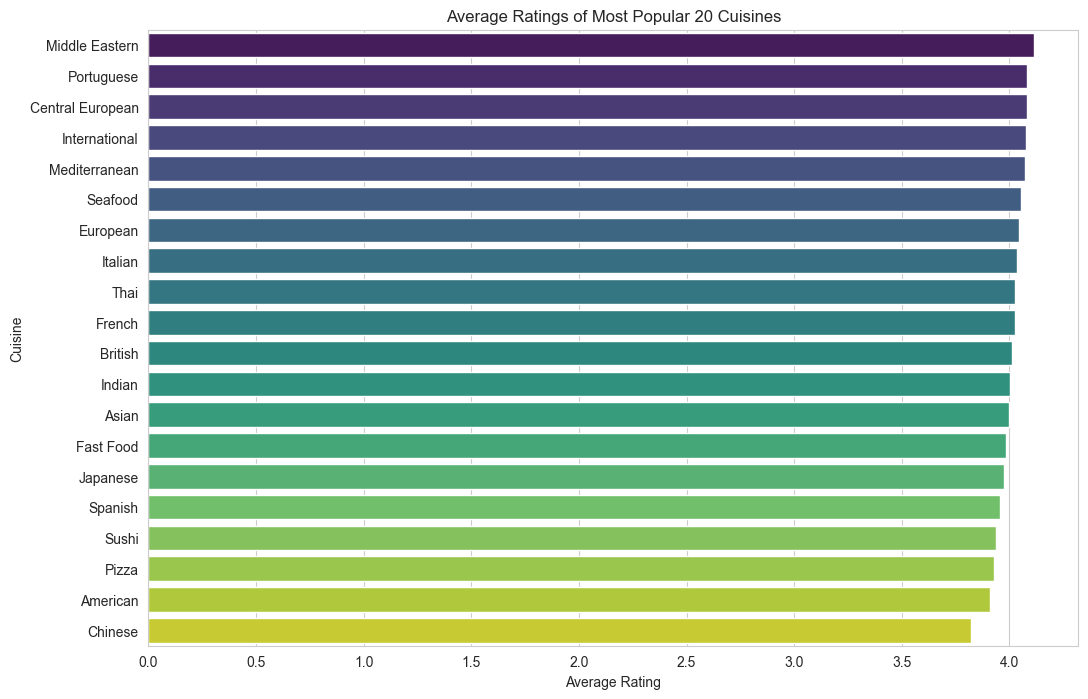

In [38]:
#bar chart showing top_cuisines average rating
avg_ratings = df_exploded.groupby('Cuisine_List')['Rating'].mean().loc[top_cuisines.index].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')
plt.title('Average Ratings of Most Popular 20 Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

In [39]:
#print the average ratings of the top 20 cuisines from highest to lowest
avg_ratings.sort_values(ascending=False)

Cuisine_List
Middle Eastern      4.114937
Portuguese          4.084028
Central European    4.080390
International       4.079204
Mediterranean       4.071813
Seafood             4.052302
European            4.045460
Italian             4.033456
Thai                4.027312
French              4.027094
British             4.011276
Indian              4.003701
Asian               4.000437
Fast Food           3.984974
Japanese            3.973677
Spanish             3.955202
Sushi               3.938194
Pizza               3.928922
American            3.910504
Chinese             3.822827
Name: Rating, dtype: float64

Key Observations:

- Middle Eastern cuisine has the highest average rating with 4.11, suggesting that while it may be less common in terms of restaurant count, diners rate it very positively.

- Portuguese, Central European, and International cuisines also score high rating above 4.07, indicating that diners tend to enjoy a variety of European and international culinary options.

- Popular mainstream cuisines have slightly lower ratings, Mediterranean (4.07), European (4.05), and Italian (4.03).

- Asian cuisines show moderate ratings, Thai (4.03), Indian (4.00), Asian (4.00), and Sushi (3.94), Japanese (3.97).

- Fast Food (3.98) and American (3.91) cuisines have the lowest ratings, they may be less satisfying or perceived as lower quality compared to traditional or specialty cuisines.


### Key Insights:

Key Findings

- Local and national cuisines dominate city-level preferences across most European cities. 

- This clearly shows that local cuisine forms the backbone of each city’s restaurant landscape, reflecting deep cultural ties and consumer preferences for familiar flavors.

- European (26,804) and Mediterranean cuisines lead overall(16,912) and Italian (14,930) cuisines are the most prevalent across the dataset.

- Asian cuisines add diversity but remain secondary in prevalence. Japanese, Chinese, Indian, Thai, and Sushi enriching the culinary variety but not surpassing European categories in dominance.

- Niche cuisines as Middle Eastern cuisine receive higher ratings (4.11) despite lower presence, while Portuguese, Central European, and International cuisines also exceed (4.07). This suggests strong appreciation for authenticity and distinct culinary experiences.

- Fast and casual options are less favorably rated indicating lower perceived quality or satisfaction compared to traditional and specialty cuisines.

- Bar and Pub establishments form a significant segment as their prevalence highlights the importance of social and casual dining in European food culture, often serving as gathering spaces beyond traditional meals.

- Additionally, dietary options such as Vegetarian Friendly, Vegan, and Gluten Free are frequently searched for, adding value to restaurants by appealing to health-conscious and diverse dietary preferences.
### Conclusion:

The analysis shows that local cuisines dominate city-level preferences, reflecting strong cultural and culinary traditions across Europe. European and Mediterranean cuisines are the most widespread overall and customer preferences are shaped by cultural familiarity, quality, and dining experience, highlighting opportunities to preserve local culinary identity, promote high-rated niche cuisines, and improve mainstream offerings, and expand dietary options to attract wider audiences.

---

# Cuisine Vs Price Range
Examines the relationship between cuisine type and price range, exploring how different cuisines are distributed across various pricing categories. Since cuisines differ in ingredients, preparation complexity, and overall dining experience, certain cuisines are expected to align with specific price levels. For example, fine-dining cuisines like French or Japanese may appear more in higher price ranges, while Fast Food or casual options may dominate lower price categories. This analysis will use two key variables Cuisine_List and Price_Range.

In [40]:
#top 5 cuisines in each price range
top_cuisines_price = df_exploded.groupby(['Price_Range', 'Cuisine_List']).size().reset_index(name='Count')
top_cuisines_price = top_cuisines_price.loc[top_cuisines_price.groupby('Price_Range')['Count'].nlargest(5).index.get_level_values(1)]
top_cuisines_price = top_cuisines_price.sort_values(by=['Price_Range', 'Count'], ascending=[True, False])
#print top 5 cuisines in each price range
top_cuisines_price

,Price_Range,Cuisine_List,Count
34,High,European,2380
59,High,Mediterranean,1015
36,High,French,1008
52,High,Italian,702
75,High,Seafood,476
135,Low,European,3640
154,Low,Italian,3213
136,Low,Fast Food,3178
163,Low,Mediterranean,2786
176,Low,Pizza,1965


C:\Users\amron\AppData\Local\Temp\ipykernel_30264\3559442405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisine_List', y='Count', data=data, palette='viridis')
C:\Users\amron\AppData\Local\Temp\ipykernel_30264\3559442405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisine_List', y='Count', data=data, palette='viridis')
C:\Users\amron\AppData\Local\Temp\ipykernel_30264\3559442405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisine_List', y='Count', data=data, palette='viridis')


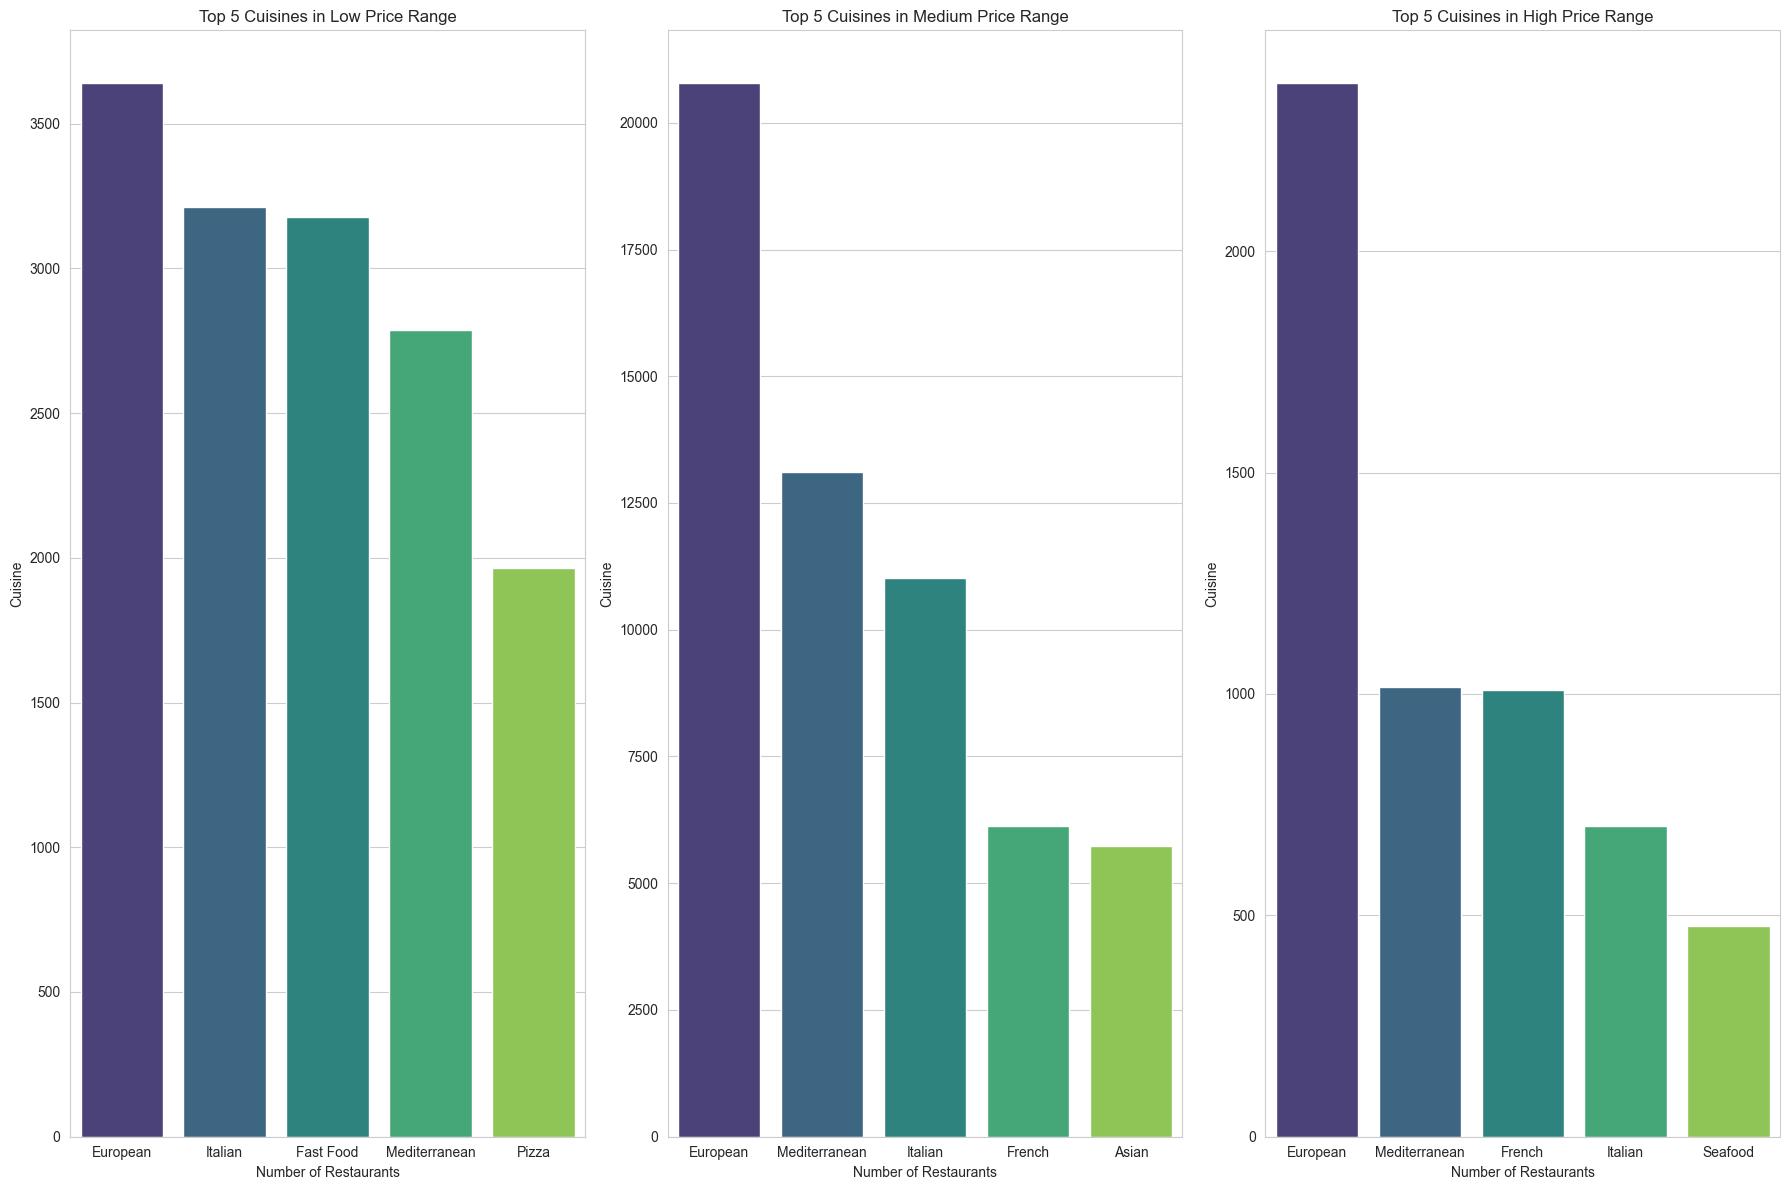

In [41]:
#subplot of top 5 cuisines within each price range 
plt.figure(figsize=(18, 12))
price_ranges = ['Low', 'Medium', 'High']
for i, price in enumerate(price_ranges):
    plt.subplot(1, 3, i + 1)
    data = top_cuisines_price[top_cuisines_price['Price_Range'] == price]
    sns.barplot(x='Cuisine_List', y='Count', data=data, palette='viridis')
    plt.title(f'Top 5 Cuisines in {price} Price Range')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


### Key Insights:
- European cuisine dominates across all price levels

  - It ranks #1 in low (3,640), medium (20,784), and high (2,380) price categories.

  - This reflects its versatility spanning everything from affordable local eateries to mid-range and upscale dining experiences across Europe.

- Mediterranean and Italian cuisines have strong mid-range appeal

  - Both cuisines are consistently in the top 3 across all price categories, but their highest presence is in the medium range (Mediterranean: 13,111, Italian: 11,015).

  - This suggests these cuisines are particularly popular in casual yet quality dining, offering balanced price to experience value.

- French and Seafood cuisines are concentrated at the higher end

  - French cuisine is the 3rd most common in the high price range (1,008), aligning with its reputation for fine dining and more elaborate preparation methods.

  - Seafood appears only in the high price range (476), likely due to ingredient costs and specialized preparation  making it less accessible at lower price points.

- Fast Food and Pizza dominate the low-price segment

  - Fast Food (3,178) and Pizza (1,965) are only present in the low price range, reflecting their positioning as budget friendly and high volume options, not typically associated with upscale or mid range dining.

### Conclusion:
Cuisines clearly segment themselves by price positioning, which reflects ingredients, preparation complexity, cultural perception, and target audience.

---